# The Product Pricer – Continued

This project involves training a model to estimate a product’s price based solely on its description.

## Data Curation – Part 2

The dataset will now be expanded to include a wider range of product categories. The goal is to transform the raw data into a high-quality, structured dataset suitable for model training.  

Although less visible than model development, data curation is a core responsibility in LLM engineering. The quality of the input data directly impacts the reliability of the final model.

### Dataset Sources

- Full Dataset:  
  [Amazon Reviews 2023 – McAuley Lab on Hugging Face](https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023)

- Category Metadata Folder:  
  [Meta Categories Directory](https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/tree/main/raw/meta_categories)

---

## ⚠️ Important Notice

The next step involves constructing a large dataset of approximately 400,000 products spanning multiple categories.  
This dataset will be used in Week 7 to train a custom model. Depending on the available GPU resources, training may take 20+ hours and could incur cloud compute costs.

### Alternative Option for Faster Progress

A lighter version of the dataset focused on **Home Appliances** is available for those who prefer a quicker, more cost-effective approach.  
This smaller dataset supports the same learning outcomes, though with slightly reduced performance.

- Use `lite.ipynb` for a simplified workflow.
- Alternatively, download preprocessed pickle files directly:  
  [Pickle Files (Google Drive)](https://drive.google.com/drive/folders/1f_IZGybvs9o0J5sb3xmtTEQB3BXllzrW)


In [ ]:
# Imports

import os
import random
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset, Dataset, DatasetDict
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np
import pickle

In [2]:
# Environment

load_dotenv(override=True)
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY')
os.environ['ANTHROPIC_API_KEY'] = os.getenv('ANTHROPIC_API_KEY')
os.environ['HF_TOKEN'] = os.getenv('HF_TOKEN')

In [3]:
# Log in to HuggingFace

hf_token = os.environ['HF_TOKEN']
login(hf_token, add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [4]:
# More imports after HF login

from loaders import ItemLoader
from items import Item

%matplotlib inline

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


## The ItemLoader Utility

The `loaders.py` module contains helper functions designed to streamline the data curation process.  
These utilities assist with loading, parsing, and structuring product information for model training.

In [6]:
# Load in the same dataset as last time

items = ItemLoader("Appliances").load()

Loading dataset Appliances


100%|██████████| 95/95 [00:17<00:00,  5.47it/s]


Completed Appliances with 28,625 datapoints in 0.3 mins


In [7]:
# Look for a item..

print(items[15].prompt)

How much does this cost to the nearest dollar?

GE Genuine OEM Control Board for GE Range/Stove/Ovens
Product Description This high quality Genuine OEM GE Appliances Control Board monitors the temperature and controls the oven heat and has digital display with 11 buttons. The Control Board wiring may differ from first generation part. Please be aware that it is recommended to disconnect the appliance from all utilities prior to installation of the Control Board. From the Manufacturer This is a genuine replacement part. The model number and name for the following item is General Electric Control Board The GE Appliances Control Board is a genuine OEM (Original Equipment Manufacturer) part designed and engineered to exact specifications Replacement GE Appliances Range/Stove/Oven Control Board monitors the temperature and controls the oven heat and has digital display with 11 buttons GE Appliances Range/Stove/Oven Control Board wiring may differ from first generation

Price is $206.00


## Scaling Up the Dataset

The next step involves expanding coverage by including all product datasets relevant to a typical large home retail store. This includes categories such as electronics, electrical appliances, office equipment, and related items—excluding categories like clothing, beauty products, and books.

In [8]:
# Define the target product categories for dataset expansion, focusing on typical home and office items.
# Excludes categories like clothing, beauty, and books.

dataset_names = [
    "Automotive",
    "Electronics",
    "Office_Products",
    "Tools_and_Home_Improvement",
    "Cell_Phones_and_Accessories",
    "Toys_and_Games",
    "Appliances",
    "Musical_Instruments",
]

In [10]:
# Sequentially load and collect items from each dataset in the target list.
# Uses ItemLoader to process each dataset by name and appends the results to a master list.

items = []
for dataset_name in dataset_names:
    loader = ItemLoader(dataset_name)
    items.extend(loader.load())

Loading dataset Automotive


meta_Automotive.jsonl:  12%|#1        | 713M/6.06G [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

100%|██████████| 2004/2004 [04:33<00:00,  7.33it/s]


Completed Automotive with 911,688 datapoints in 7.9 mins
Loading dataset Electronics


100%|██████████| 1611/1611 [03:24<00:00,  7.89it/s]


Completed Electronics with 443,473 datapoints in 3.5 mins
Loading dataset Office_Products


meta_Office_Products.jsonl:  14%|#3        | 336M/2.48G [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

100%|██████████| 711/711 [01:14<00:00,  9.55it/s]


Completed Office_Products with 240,394 datapoints in 2.6 mins
Loading dataset Tools_and_Home_Improvement


meta_Tools_and_Home_Improvement.jsonl:  13%|#2        | 713M/5.56G [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

100%|██████████| 1474/1474 [03:15<00:00,  7.53it/s]


Completed Tools_and_Home_Improvement with 541,051 datapoints in 6.3 mins
Loading dataset Cell_Phones_and_Accessories


meta_Cell_Phones_and_Accessories.jsonl:  10%|#         | 451M/4.47G [00:00<?, ?B/s]

Generating full split:   0%|          | 0/1288490 [00:00<?, ? examples/s]

100%|██████████| 1289/1289 [02:04<00:00, 10.33it/s]


Completed Cell_Phones_and_Accessories with 238,869 datapoints in 4.6 mins
Loading dataset Toys_and_Games


meta_Toys_and_Games.jsonl:   0%|          | 0.00/2.64G [00:00<?, ?B/s]

Generating full split:   0%|          | 0/890874 [00:00<?, ? examples/s]

100%|██████████| 891/891 [01:42<00:00,  8.66it/s]


Completed Toys_and_Games with 340,479 datapoints in 3.7 mins
Loading dataset Appliances


100%|██████████| 95/95 [00:07<00:00, 11.90it/s]


Completed Appliances with 28,625 datapoints in 0.2 mins
Loading dataset Musical_Instruments


meta_Musical_Instruments.jsonl:  49%|####9     | 619M/1.25G [00:00<?, ?B/s]

Generating full split:   0%|          | 0/213593 [00:00<?, ? examples/s]

100%|██████████| 214/214 [00:21<00:00,  9.87it/s]


Completed Musical_Instruments with 66,829 datapoints in 0.8 mins


In [11]:
# Print the total number of items collected across all datasets, formatted with commas

print(f"A grand total of {len(items):,} items")

A grand total of 2,811,408 items


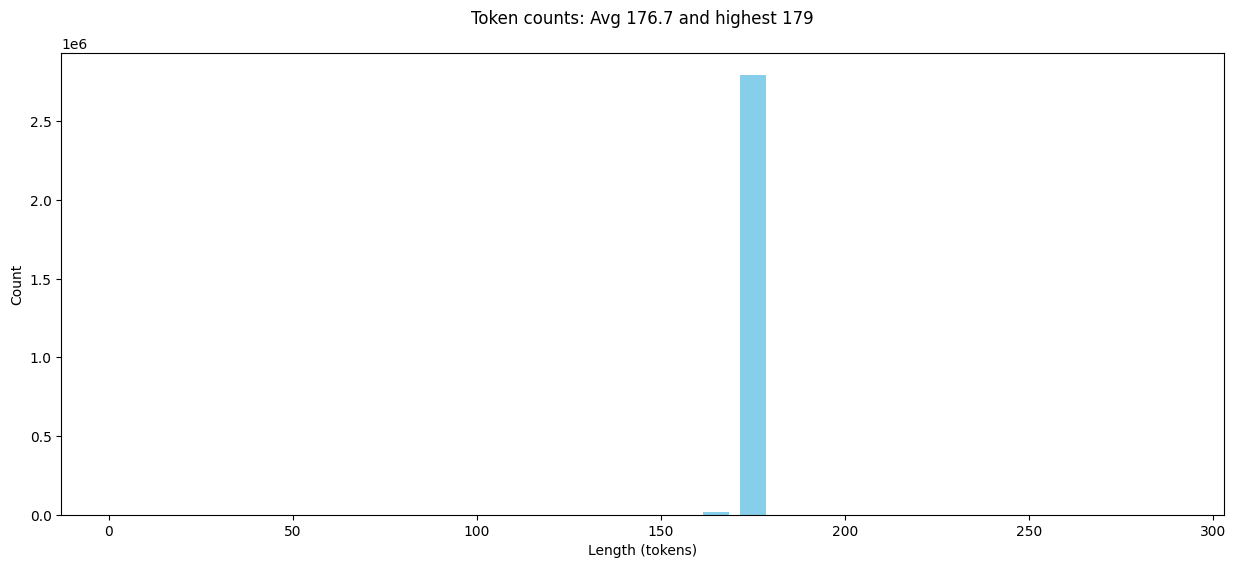

In [12]:
# Plot a histogram of token counts for all curated items.
# Shows the average and maximum token lengths to assess input size distribution.

tokens = [item.token_count for item in items]
plt.figure(figsize=(15, 6))
plt.title(f"Token counts: Avg {sum(tokens)/len(tokens):,.1f} and highest {max(tokens):,}\n")
plt.xlabel('Length (tokens)')
plt.ylabel('Count')
plt.hist(tokens, rwidth=0.7, color="skyblue", bins=range(0, 300, 10))
plt.show()

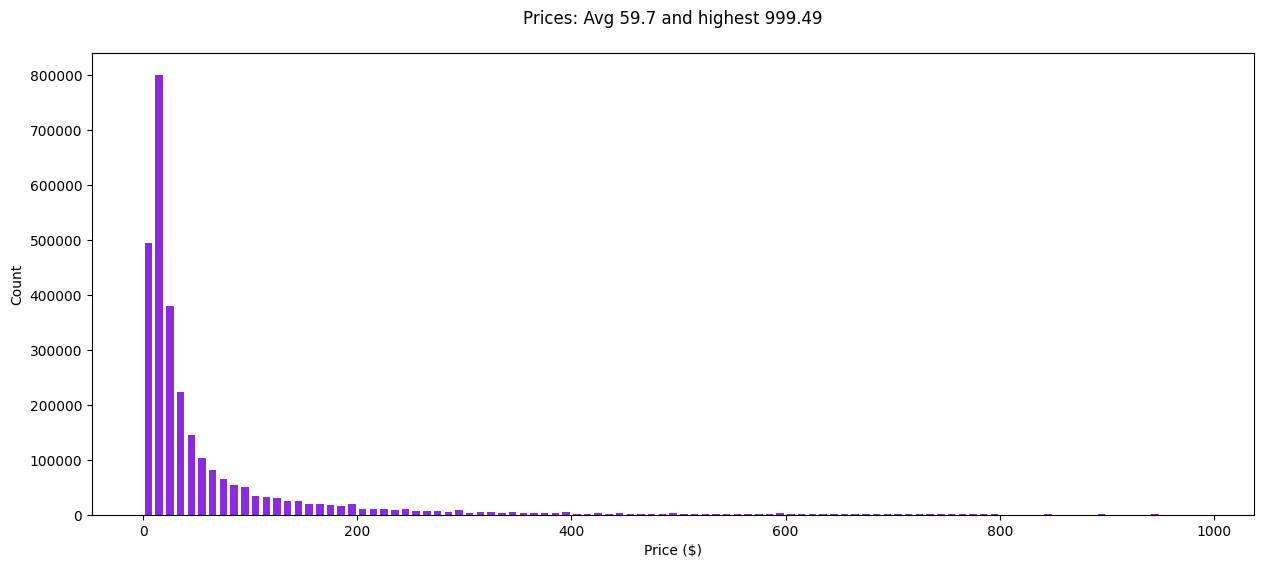

In [13]:
# Plot a histogram of item prices to visualize the overall price distribution.
# Includes the average and maximum price to highlight the dataset's value range.

prices = [item.price for item in items]
plt.figure(figsize=(15, 6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.1f} and highest {max(prices):,}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="blueviolet", bins=range(0, 1000, 10))
plt.show()

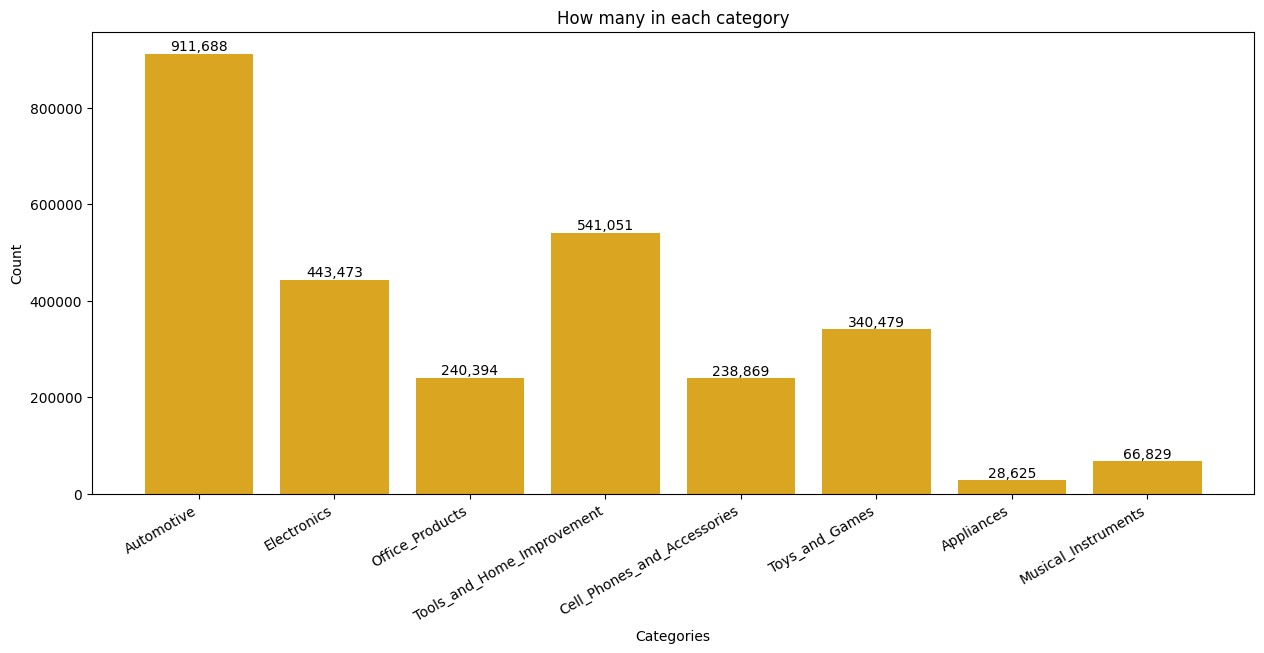

In [14]:
# Count the number of items in each product category using a Counter.
# Visualize the distribution with a bar chart to show how many items fall into each category.
# Each bar is labeled with its count for quick reference.

category_counts = Counter()
for item in items:
    category_counts[item.category]+=1

categories = category_counts.keys()
counts = [category_counts[category] for category in categories]

# Bar chart by category
plt.figure(figsize=(15, 6))
plt.bar(categories, counts, color="goldenrod")
plt.title('How many in each category')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.xticks(rotation=30, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(counts):
    plt.text(i, v, f"{v:,}", ha='center', va='bottom')

# Display the chart
plt.show()

# Objective

Construct a more balanced dataset in terms of price distribution.  
The current dataset is skewed toward lower-priced items—aim for a higher average price (target: over $60).  
Also adjust category representation by reducing the number of items from overrepresented categories, particularly **Automotive**.

In [15]:
# Group items by their rounded price values into a defaultdict.
# This creates "price slots" to help analyze or rebalance the dataset based on price distribution.

slots = defaultdict(list)
for item in items:
    slots[round(item.price)].append(item)

In [16]:
# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

sample = []

# For each price point between $1 and $999, sample items to create a more balanced dataset
for i in range(1, 1000):
    slot = slots[i]
    
    # Include all items if price is $240 or above
    if i >= 240:
        sample.extend(slot)
    
    # If the slot has 1200 items or fewer, include them all
    elif len(slot) <= 1200:
        sample.extend(slot)
    
    # If the slot is too large, sample 1200 items with category-based weighting
    else:
        # Assign lower weight to 'Automotive' to reduce overrepresentation
        weights = np.array([1 if item.category == 'Automotive' else 5 for item in slot])
        weights = weights / np.sum(weights)
        
        # Select a weighted random sample of 1200 items
        selected_indices = np.random.choice(len(slot), size=1200, replace=False, p=weights)
        selected = [slot[i] for i in selected_indices]
        sample.extend(selected)

# Print the total number of items in the final sampled dataset
print(f"There are {len(sample):,} items in the sample")

There are 408,635 items in the sample


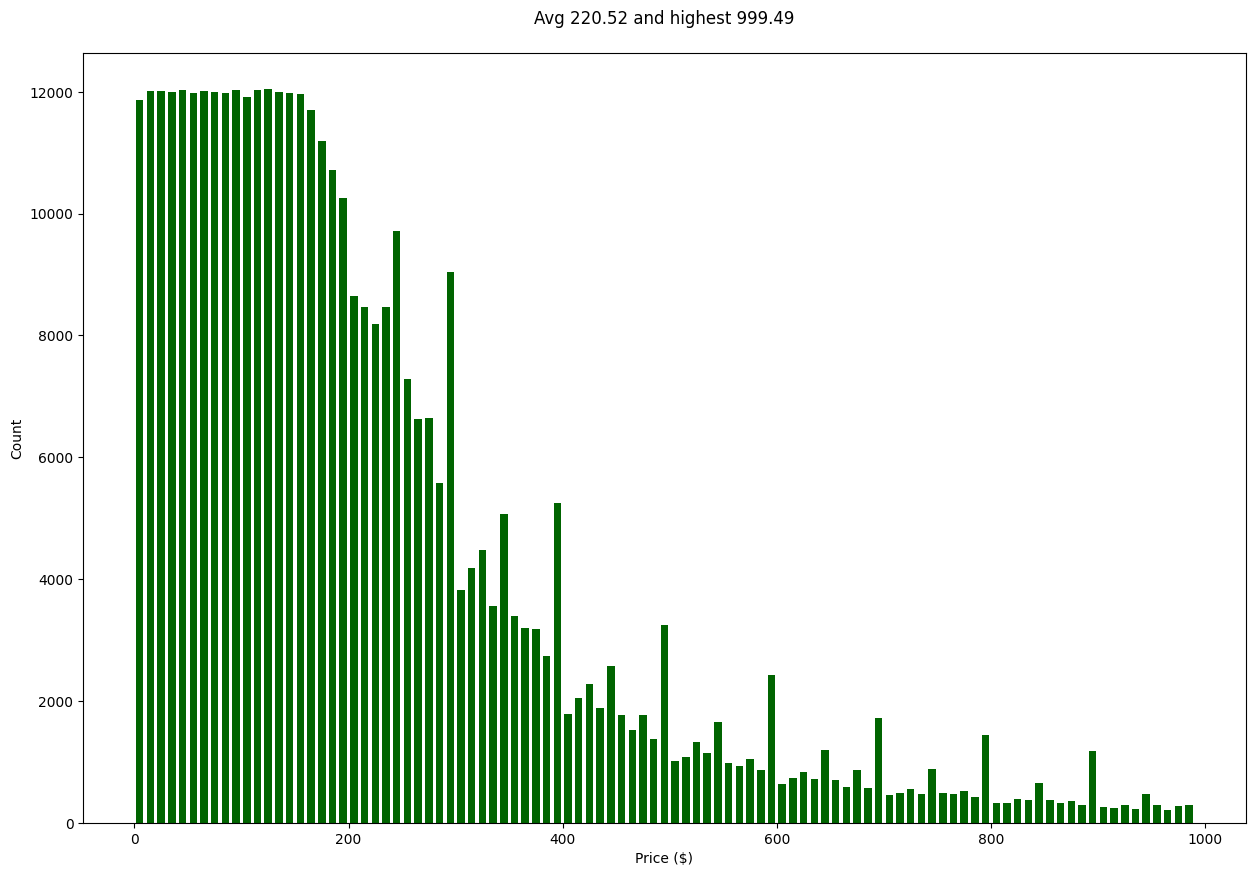

In [29]:
# Plot the distribution of prices in sample

prices = [float(item.price) for item in sample]
plt.figure(figsize=(15, 10))
plt.title(f"Avg {sum(prices)/len(prices):.2f} and highest {max(prices):,.2f}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="darkgreen", bins=range(0, 1000, 10))
plt.show()

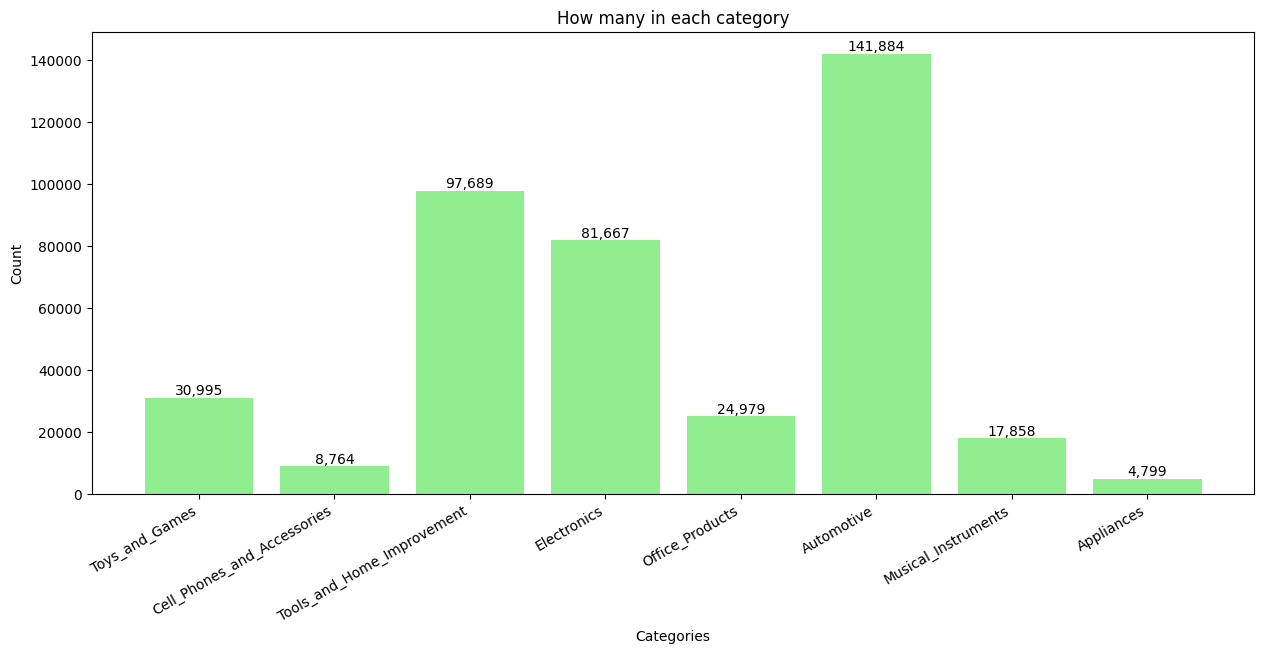

In [18]:
# Count and visualize the number of items per category in the rebalanced sample dataset.
# Display a bar chart with counts labeled to confirm improved category distribution.

category_counts = Counter()
for item in sample:
    category_counts[item.category]+=1

categories = category_counts.keys()
counts = [category_counts[category] for category in categories]

# Create bar chart
plt.figure(figsize=(15, 6))
plt.bar(categories, counts, color="lightgreen")

# Customize the chart
plt.title('How many in each category')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.xticks(rotation=30, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(counts):
    plt.text(i, v, f"{v:,}", ha='center', va='bottom')

# Display the chart
plt.show()

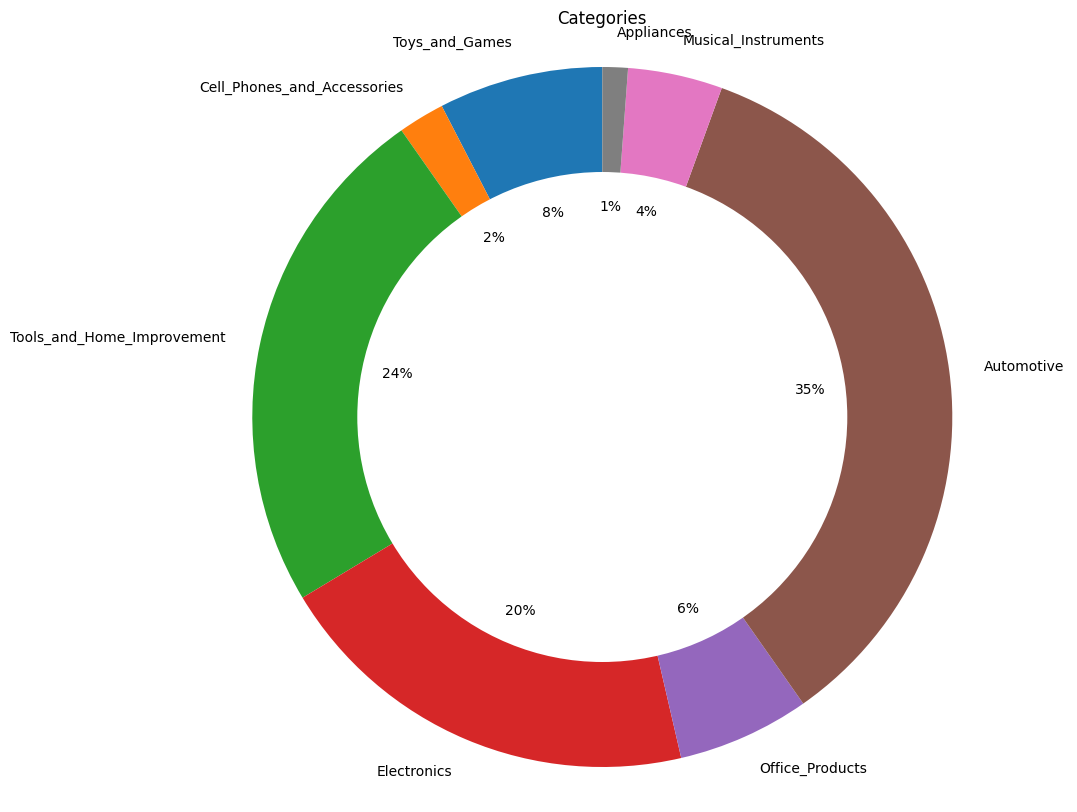

In [19]:
# Display a pie chart (with optional donut style) to show the proportion of each category in the rebalanced dataset.
# Helps visualize relative category presence beyond absolute counts.

plt.figure(figsize=(12, 10))
plt.pie(counts, labels=categories, autopct='%1.0f%%', startangle=90)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Categories')

plt.axis('equal')  

plt.show()

# Dataset Curation Complete

A refined dataset has been successfully constructed with balanced price ranges and improved category distribution. Proceeding with final checks to validate the dataset quality.


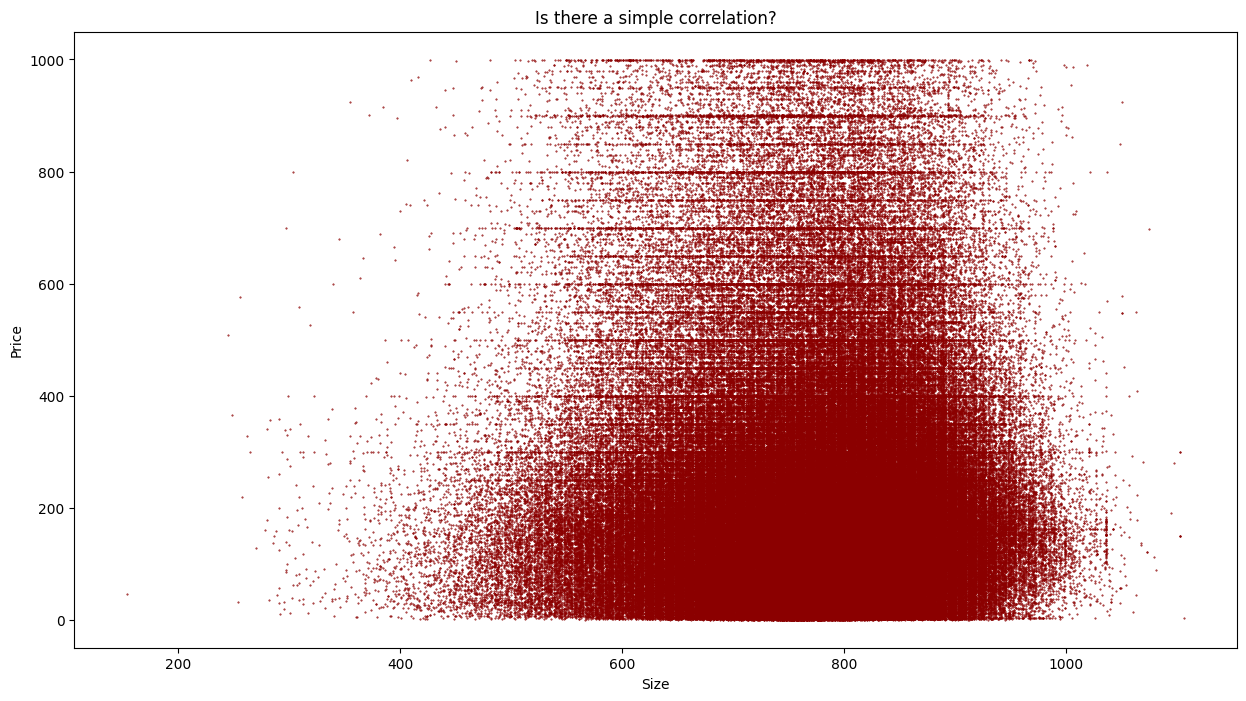

In [30]:
# Analyze the relationship between prompt character length and item price using a scatter plot.
# Helps identify whether there's a visible correlation between input size and price.

sizes = [len(item.prompt) for item in sample]
prices = [item.price for item in sample]

plt.figure(figsize=(15, 8))
plt.scatter(sizes, prices, s=0.2, color="darkred")

plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Is there a simple correlation?')

plt.show()

In [21]:
# Display the prompt text and inspect the last 10 tokens of its encoding.
# Useful for debugging how the tokenizer processes and truncates the input.

def report(item):
    prompt = item.prompt
    tokens = Item.tokenizer.encode(item.prompt)
    print(prompt)
    print(tokens[-10:])
    print(Item.tokenizer.batch_decode(tokens[-10:]))

In [32]:
# Run the report on the 398,001st item in the sample to inspect its prompt and final tokens.

report(sample[399002])

How much does this cost to the nearest dollar?

KidKraft Wooden Sweet & Pretty Dollhouse with Elevator and Accessories, for Dolls, Large House, Gift for Ages 3+
Kids will have a endless hours of imaginary play with our KidKraft Sweet & Pretty Dollhouse. Just shy of four feet and featuring three levels and four rooms of fun, a porch area with a front door that opens and closes and an elevator that glides from the first floor to the second, this dollhouse has it all! The included accessory pack offer limitless decorative possibilities for dolls. 15 pieces of colorful furniture Moveable porch slides back and forth on the bottom floor Gliding elevator Piano plays music at the push of a button Accommodates Barbie dolls and other fashion dolls up to 12 tall Dimensions 20.5 x 46.75 x

Price is $165.00
[13, 2075, 865, 271, 7117, 374, 400, 10680, 13, 410]
['.', '75', ' x', '\n\n', 'Price', ' is', ' $', '165', '.', '00']


## Observation

The LLaMA tokenizer has an interesting characteristic: numbers from 1 to 999 are typically encoded as single tokens—similar to the behavior observed with GPT-4o.  
In contrast, tokenizers for models like Qwen2, Gemma, and Phi-3 tend to tokenize individual digits separately.

While this behavior isn't critical for this project, it does provide a slight advantage in terms of token efficiency when handling numeric data like prices.

In [23]:
# Shuffle the full sample to randomize the order of items.
# Split the data into a training set of 400,000 items and a test set of 2,000 items.

random.seed(42)
random.shuffle(sample)
train = sample[:400_000]
test = sample[400_000:402_000]
print(f"Divided into a training set of {len(train):,} items and test set of {len(test):,} items")

Divided into a training set of 400,000 items and test set of 2,000 items


In [24]:
print(train[0].prompt)

How much does this cost to the nearest dollar?

Delphi FG0166 Fuel Pump Module
Delphi brings 80 years of OE Heritage into each Delphi pump, ensuring quality and fitment for each Delphi part. Part is validated, tested and matched to the right vehicle application Delphi brings 80 years of OE Heritage into each Delphi assembly, ensuring quality and fitment for each Delphi part Always be sure to check and clean fuel tank to avoid unnecessary returns Rigorous OE-testing ensures the pump can withstand extreme temperatures Brand Delphi, Fit Type Vehicle Specific Fit, Dimensions LxWxH 19.7 x 7.7 x 5.1 inches, Weight 2.2 Pounds, Auto Part Position Unknown, Operation Mode Mechanical, Manufacturer Delphi, Model FUEL PUMP, Dimensions 19.7

Price is $227.00


In [25]:
print(test[0].test_prompt())

How much does this cost to the nearest dollar?

OEM AC Compressor w/A/C Repair Kit For Ford F150 F-150 V8 & Lincoln Mark LT 2007 2008 - BuyAutoParts NEW
As one of the world's largest automotive parts suppliers, our parts are trusted every day by mechanics and vehicle owners worldwide. This A/C Compressor and Components Kit is manufactured and tested to the strictest OE standards for unparalleled performance. Built for trouble-free ownership and 100% visually inspected and quality tested, this A/C Compressor and Components Kit is backed by our 100% satisfaction guarantee. Guaranteed Exact Fit for easy installation 100% BRAND NEW, premium ISO/TS 16949 quality - tested to meet or exceed OEM specifications Engineered for superior durability, backed by industry-leading unlimited-mileage warranty Included in this K

Price is $


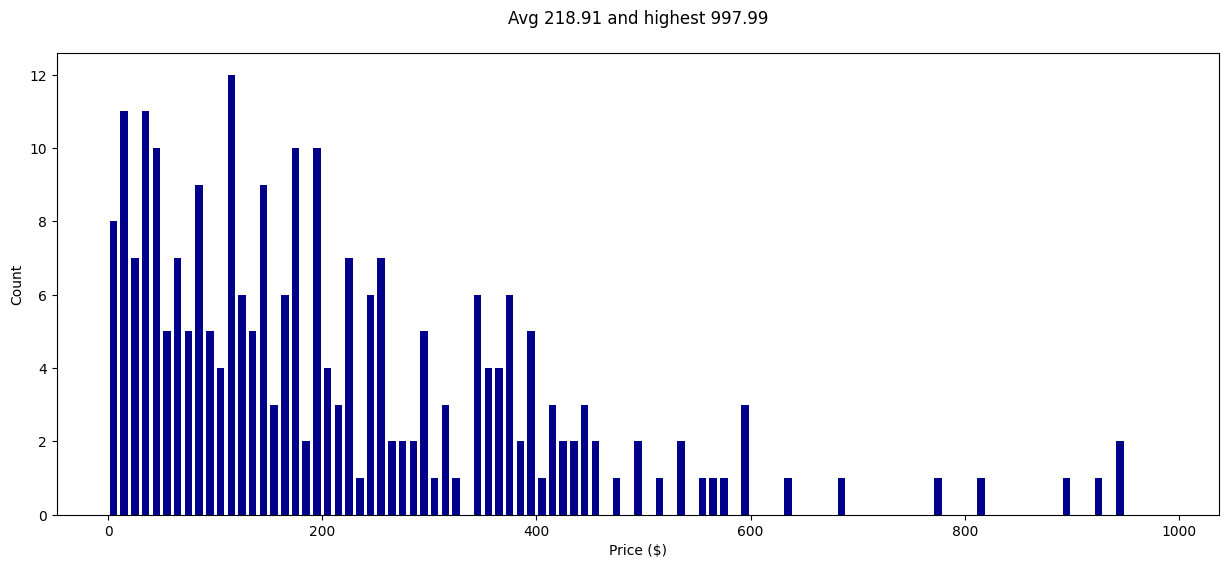

In [26]:
# Plot the distribution of prices in the first 250 test points

prices = [float(item.price) for item in test[:250]]
plt.figure(figsize=(15, 6))
plt.title(f"Avg {sum(prices)/len(prices):.2f} and highest {max(prices):,.2f}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="darkblue", bins=range(0, 1000, 10))
plt.show()

# Final Step – Upload the Curated Dataset

Convert the processed items into prompt-format data and upload the final dataset to the Hugging Face Hub.  
This makes the dataset easily shareable and ready for training or fine-tuning workflows.

In [27]:
# Extract prompt text and price values from the training and test sets.
# Use standard prompts for training, and test-time prompts for evaluation purposes.

train_prompts = [item.prompt for item in train]
train_prices = [item.price for item in train]
test_prompts = [item.test_prompt() for item in test]
test_prices = [item.price for item in test]

In [ ]:
# Create a Dataset from the lists

train_dataset = Dataset.from_dict({"text": train_prompts, "price": train_prices})
test_dataset = Dataset.from_dict({"text": test_prompts, "price": test_prices})
dataset = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

In [35]:
HF_USER = "Coelhoo"
DATASET_NAME = f"{HF_USER}/pricer-data"
dataset.push_to_hub(DATASET_NAME, private=True)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/400 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/Coelhoo/pricer-data/commit/c00e4070aa0bfdfa569ce17f516382d1585411d4', commit_message='Upload dataset', commit_description='', oid='c00e4070aa0bfdfa569ce17f516382d1585411d4', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/Coelhoo/pricer-data', endpoint='https://huggingface.co', repo_type='dataset', repo_id='Coelhoo/pricer-data'), pr_revision=None, pr_num=None)

In [36]:
# Save the training and test datasets to disk as pickle files for later use or sharing.
# This preserves the full structure of each Item instance.

with open('train.pkl', 'wb') as file:
    pickle.dump(train, file)

with open('test.pkl', 'wb') as file:
    pickle.dump(test, file)